In [5]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    #RWR: the following has been modified to fit larger-magnitude roots and manage ticks
    r = 1.1*max(1.5/1.1,np.abs(np.concatenate((p.real,p.imag,z.real,z.imag))).max()); 
    plt.axis('scaled');
    if r<1.6:
        ticks = [-1, -.5, .5, 1]; 
    elif r<5:
        ticks = [-2,-1, -.5, .5, 1,2]; 
    elif r<10:
        ticks = [-5,-2,-1,1,2,5]; 
    elif r<20:
        ticks = [-10,-1,1,10]; 
    else:
        rlog = np.ceil(np.log10(r))
        ticks = np.arange(-(10**rlog),(10**rlog)+1,10**(rlog-1)*2); 
    
    plt.xticks(ticks);
    plt.yticks(ticks)
    plt.axis([-r, r, -r, r])

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

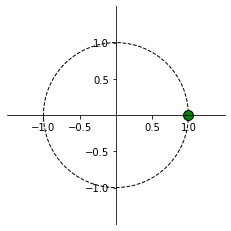

(array([1.]), array([], dtype=float64), 1.9)

In [8]:
import numpy as np
from scipy import signal
a = np.array([1.0])
b = np.array([1.9,-1.9])
zplane(b,a)


<ipython-input-9-7a404c00b644>:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(np.abs(H)), 'b')


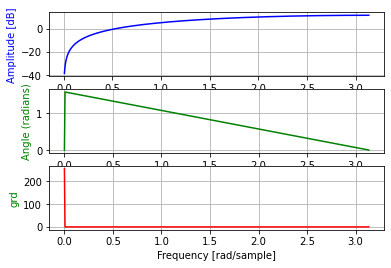

In [9]:
w, H = signal.freqz(b,a)


import matplotlib.pyplot as plt
plt.subplot(311)
plt.plot(w, 20 * np.log10(np.abs(H)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.subplot(312)
angles = np.unwrap(np.angle(H))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')

plt.subplot(313)
grd = np.diff(angles)/np.diff(w)
grd_temp=np.append(grd,0)
plt.plot(w, grd_temp, 'r')
plt.ylabel('grd', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.show()

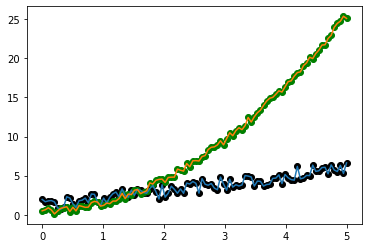

In [14]:
import numpy as np
import pylab as plt

X = np.linspace(0,5,100)
Y1 = X + 2*np.random.random(X.shape)
Y2 = X**2 + np.random.random(X.shape)
plt.plot(X,Y1)
plt.plot(X,Y2)
plt.scatter(X,Y1,color='k')
plt.scatter(X,Y2,color='g')
plt.show()

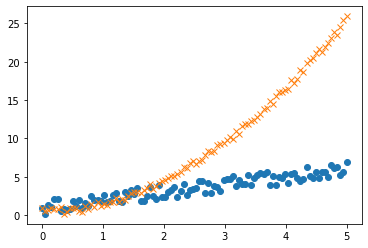

In [15]:
import numpy as np
import pylab as plt

X = np.linspace(0,5,100)
Y1 = X + 2*np.random.random(X.shape)
Y2 = X**2 + np.random.random(X.shape)

fig, ax = plt.subplots()
ax.plot(X,Y1,'o')
ax.plot(X,Y2,'x')
plt.show()

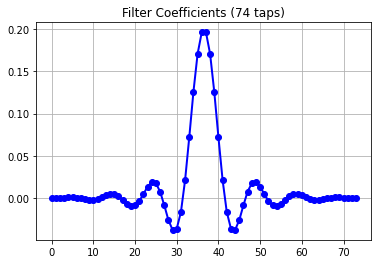

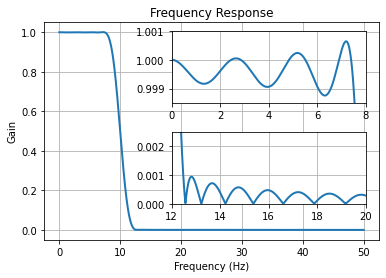

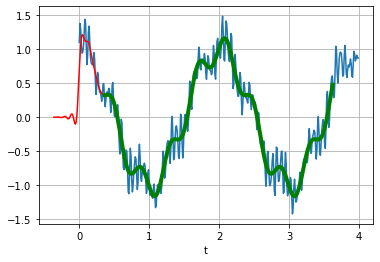

In [16]:
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show


#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)


#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)

#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(3)
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)

show()


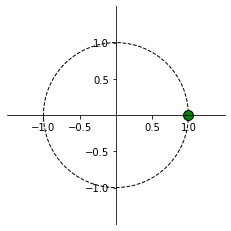

<ipython-input-19-7af432bd2e29>:12: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(np.abs(H)), 'b')


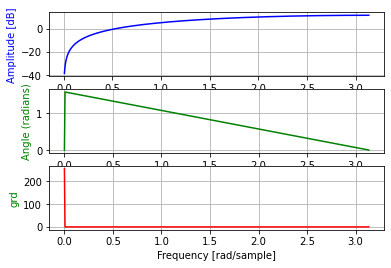

In [19]:
import numpy as np
from scipy import signal
a = np.array([1.0])
b = np.array([1.9,-1.9])
zplane(b,a)

w, H = signal.freqz(b,a)


import matplotlib.pyplot as plt
plt.subplot(311)
plt.plot(w, 20 * np.log10(np.abs(H)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.subplot(312)
angles = np.unwrap(np.angle(H))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')

plt.subplot(313)
grd = np.diff(angles)/np.diff(w)
grd_temp=np.append(grd,0)
plt.plot(w, grd_temp, 'r')
plt.ylabel('grd', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.show()